# This is a stock price predictor for any stock.
## By Niam Bashambu

In [12]:
#doing imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from pandas_datareader import data


In [20]:
tickers = 'BRK-B'

start_date = '1980-12-01'
end_date = '2022-12-31'

stock_data = yf.download(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
#Print data
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,BRK-B,BRK-B,BRK-B,BRK-B,BRK-B
Date,,,,,
1996-05-09,23.200001,24.400000,22.200001,22.200001,4290000
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000
1996-05-13,23.900000,24.100000,23.299999,24.000000,700000
1996-05-14,23.600000,24.100000,23.100000,24.000000,310000
1996-05-15,23.200001,23.700001,23.000000,23.600000,545000
1996-05-16,22.600000,23.100000,22.299999,23.100000,360000
1996-05-17,22.799999,23.000000,22.600000,22.600000,325000
1996-05-20,22.500000,23.000000,22.400000,22.900000,240000


In [22]:
stock_data.reset_index(inplace=True)
stock_data.dropna(inplace=True)
stock_data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BRK-B,BRK-B,BRK-B,BRK-B,BRK-B
0,1996-05-09,23.200001,24.400000,22.200001,22.200001,4290000
1,1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000
2,1996-05-13,23.900000,24.100000,23.299999,24.000000,700000
3,1996-05-14,23.600000,24.100000,23.100000,24.000000,310000
4,1996-05-15,23.200001,23.700001,23.000000,23.600000,545000
...,...,...,...,...,...,...
6703,2022-12-23,306.489990,306.570007,300.929993,302.880005,2460400
6704,2022-12-27,305.549988,308.579987,304.649994,306.450012,2730900
6705,2022-12-28,303.429993,307.459991,303.260010,304.769989,2628200


In [23]:
stock_data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BRK-B,BRK-B,BRK-B,BRK-B,BRK-B
count,6708,6708.000000,6708.000000,6708.000000,6708.000000,6.708000e+03
mean,2009-09-04 05:36:36.064400640,106.615645,107.394541,105.774994,106.639354,2.610965e+06
min,1996-05-09 00:00:00,20.100000,20.360001,19.799999,20.100000,1.000000e+04
25%,2003-01-07 18:00:00,49.160000,49.594999,48.735002,49.200001,5.700000e+05
50%,2009-09-03 12:00:00,77.184998,77.985001,76.420002,77.155003,2.033700e+06
75%,2016-05-04 06:00:00,145.537498,146.192501,144.684994,145.412502,3.845950e+06
max,2022-12-30 00:00:00,359.570007,362.100006,355.529999,361.390015,3.161342e+08
std,NaN,75.644870,76.178090,75.088392,75.687281,4.747081e+06


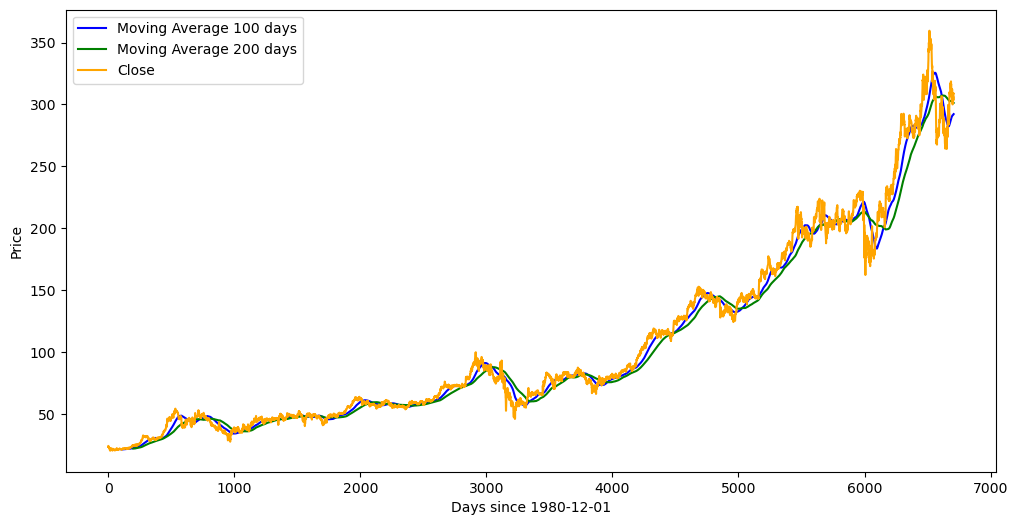

In [30]:
#Plotting the data and the moving averages
avg1 = stock_data['Close'].rolling(100).mean()
avg2 = stock_data['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(avg1, 'blue', label='Moving Average 100 days')
plt.plot(avg2, 'green', label='Moving Average 200 days')
plt.plot(stock_data['Close'], 'orange', label='Close')
plt.legend(loc='upper left')
plt.xlabel('Days since 1980-12-01')
plt.ylabel('Price')
plt.show()